In [1]:
import numpy as np
import random

import axelrod as axl

In [2]:
import tqdm

In [3]:
import warnings

warnings.filterwarnings("ignore")

In [4]:
import evol_dynamics

In [5]:
import matplotlib.pyplot as plt
import matplotlib

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [6]:
import glob

import itertools

import pandas as pd

In [7]:
from scipy import stats

**Simulations for different games**

In [8]:
simulation_columns = [
    "R",
    "S",
    "T",
    "P",
    "N",
    "delta",
    "beta",
    "mode",
    "cooperation",
    "score",
    "y",
    "p",
    "q",
]

In [9]:
columns = [
    "R",
    "S",
    "T",
    "P",
    "N",
    "delta",
    "beta",
    "mode",
    "t",
    "cooperation",
    "score",
    "y",
    "p",
    "q",
]

# Stag Hunt Game

The stag hunt or sometimes referred to as the assurance game or trust dilemma describes a conflict between safety and social cooperation.


Two individuals go out on a hunt. 

- Each can individually choose to hunt a stag or hunt a hare.
- Each player must choose an action without knowing the choice of the other.
- If an individual hunts a stag, they must have the cooperation of their partner in order to succeed.
- An individual can get a hare by himself, but a hare is worth less than a stag.

The normal form representation of the game:


\begin{pmatrix}
    (a, a) & (b, c)  \\
    (c, b) & (d, d)
\end{pmatrix}

The numerical experiments were for $a=3, b=0, c=2, d=1$:

\begin{pmatrix}
    (3, 3) & (0, 2)  \\
    (2, 0) & (1, 1)
\end{pmatrix}


In [10]:
modes = ["expected", "stochastic"]
cmaps = [matplotlib.cm.get_cmap("Blues"), matplotlib.cm.get_cmap("Reds")]

In [11]:
stag_dfs = []
for file in glob.glob('data/*_stag_payoffs.csv'):
    df = pd.read_csv(file, header=None)
    df.columns = simulation_columns
    stag_dfs.append(df)

In [12]:
stag = pd.concat(stag_dfs)

In [13]:
stag.groupby('mode')["cooperation"].mean()

mode
expected      0.991526
stochastic    0.988512
Name: cooperation, dtype: float64

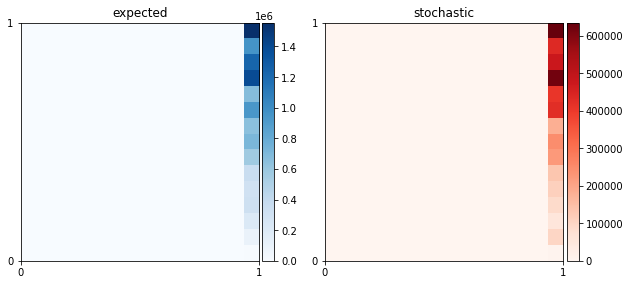

In [15]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 7))

for i, mode in enumerate(modes):

    x, y = evol_dynamics.numerical._reshape_data(stag[stag['mode']==mode])

    heatmap, xedges, yedges = np.histogram2d(x, y, bins=15)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    im = ax[i].imshow(heatmap.T, extent=extent, cmap=cmaps[i], origin="lower")
    
    divider = make_axes_locatable(ax[i])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

    ax[i].set_xticks(np.linspace(0, 1, 2))
    ax[i].set_yticks(np.linspace(0, 1, 2))
    
    ax[i].title.set_text(mode)

fig.show()

In [55]:
colors = ["C0", "C3"]
alphas = [1, 0.8]

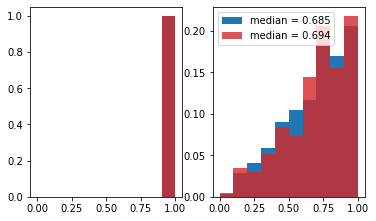

In [66]:
fig, ax = plt.subplots(ncols=2, figsize=(6, 3.5))

for i, mode in enumerate(modes):
    df = stag[stag['mode']==mode]

    for j, column in enumerate(["p", "q"]):
        
        measure = df[column]
        mean = np.mean(measure)
        weights = np.ones_like(measure) / float(len(measure))

        ax[j].hist(
            measure,
            weights=weights,
            label=f"median = {round(mean, 3)}",
            color=colors[i],
            alpha=alphas[i],
        )
    ax[j].legend();

In [73]:
tStat, pStat = stats.ttest_ind(stag[stag["mode"]=="expected"]["q"],
                               stag[stag["mode"]=="stochastic"]["q"],
                               equal_var=False)

In [74]:
pStat

0.0

In [75]:
ALLD_dfs = []

for file in glob.glob(f"data/invade_ALLD/stag/*.csv"):
    df = pd.read_csv(file, header=None)
    df.columns = columns
    ALLD_dfs.append(df)
    
invade_defector_stag =  pd.concat(ALLD_dfs)

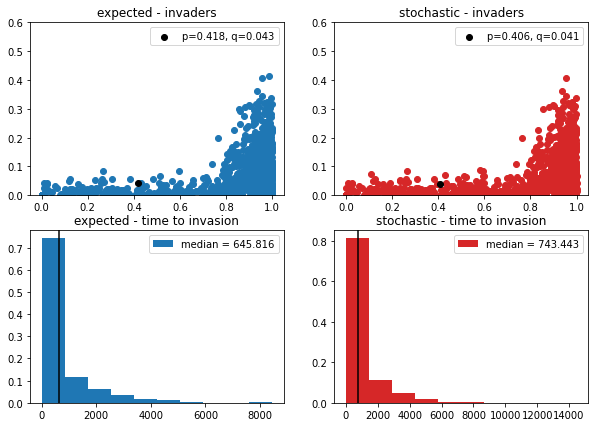

In [51]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10, 7))

for i, mode in enumerate(modes):
    
    df = invade_defector_stag[invade_defector_stag["mode"] == mode]
    
    # top row
    xs, ys = zip(*df[["p", "q"]].values)
    
    average_invador = [np.mean(df["p"]), np.mean(df["q"])]
    
    ax[(0, i)].scatter(xs, ys, color=colors[i])
    ax[(0, i)].scatter(average_invador[0], average_invador[1], color="black",
                  label=f"p={round(average_invador[0], 3)}, q={round(average_invador[1], 3)}")
    ax[(0, i)].set_ylim(0, 0.6)
    ax[(0, i)].title.set_text(f"{mode} - invaders")
    ax[(0, i)].legend()
    
    # bottom row
    
    measure = df["t"]
    mean = np.mean(measure)
    weights = np.ones_like(measure) / float(len(measure))

    ax[(1, i)].hist(
        measure,
        weights=weights,
        label=f"median = {round(mean, 3)}",
        color=colors[i],
    )
    ax[(1, i)].axvline(mean, color="black")
    ax[(1, i)].title.set_text(f"{mode} - time to invasion")
    
    ax[(1, i)].legend();

In [53]:
GTFT_dfs = []

for file in glob.glob(f"data/invade_GTFT/stag/*.csv"):
    df = pd.read_csv(file, header=None)
    df.columns = columns
    GTFT_dfs.append(df)
    
invade_generous_tft_stag =  pd.concat(GTFT_dfs)

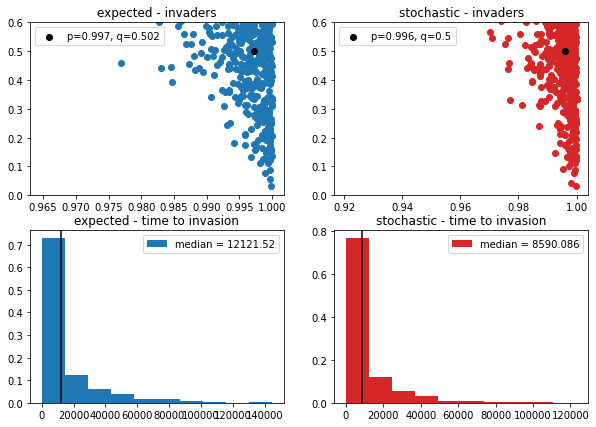

In [54]:
colors = ["C0", "C3"]

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10, 7))

for i, mode in enumerate(modes):
    
    df = invade_generous_tft_stag[invade_defector_stag["mode"] == mode]
    
    # top row
    xs, ys = zip(*df[["p", "q"]].values)
    
    average_invador = [np.mean(df["p"]), np.mean(df["q"])]
    
    ax[(0, i)].scatter(xs, ys, color=colors[i])
    ax[(0, i)].scatter(average_invador[0], average_invador[1], color="black",
                  label=f"p={round(average_invador[0], 3)}, q={round(average_invador[1], 3)}")
    ax[(0, i)].set_ylim(0, 0.6)
    ax[(0, i)].title.set_text(f"{mode} - invaders")
    ax[(0, i)].legend()
    
    # bottom row
    
    measure = df["t"]
    mean = np.mean(measure)
    weights = np.ones_like(measure) / float(len(measure))

    ax[(1, i)].hist(
        measure,
        weights=weights,
        label=f"median = {round(mean, 3)}",
        color=colors[i],
    )
    ax[(1, i)].axvline(mean, color="black")
    ax[(1, i)].title.set_text(f"{mode} - time to invasion")
    
    ax[(1, i)].legend();

# Snowdrift Game

The snowdrift game, also known as the hawk–dove game or game of chicken.


The situation of the Snowdrift game involves two drivers who are trapped on opposite sides of a snowdrift.

- Each has the option of staying in the car or shoveling snow to clear a path. Letting the opponent do all the work is the best option (with a pay-off of 300 used in this study), but being exploited by shoveling while the opponent sits in the car still results in a pay-off of 100. (The other two possibilities, both shoveling and both sitting, have pay-offs of 200 and 0, respectively.)

The normal form representation of the game:


\begin{pmatrix}
    (b - \frac{c}{2}, b - \frac{c}{2}) & (b - c, b) \\
    (b, b - c) & (0, 0)
\end{pmatrix}

The numerical experiments were for $c=1, b=3$:

\begin{pmatrix}
    (2.5, 2.5) & (2, 3)  \\
    (3, 2) & (0, 0)
\end{pmatrix}


In [139]:
evol_dynamics.snowdrift_game(1, 2)

(1.5, 1, 2, 0)

In [142]:
snow = pd.read_csv('data/expected_snowdrift_6_payoffs.csv', header=None)
snow.columns = simulation_columns
snow.tail()

,R,S,T,P,N,delta,beta,mode,cooperation,score,y,p,q
9999996,2.5,2,3,0,100,0.999,1,expected,0.849991,2.442185,0.148532,0.91944,0.461154
9999997,2.5,2,3,0,100,0.999,1,expected,0.849991,2.442185,0.148532,0.91944,0.461154
9999998,2.5,2,3,0,100,0.999,1,expected,0.849991,2.442185,0.148532,0.91944,0.461154
9999999,2.5,2,3,0,100,0.999,1,expected,0.849991,2.442185,0.148532,0.91944,0.461154
10000000,2.5,2,3,0,100,0.999,1,expected,0.849991,2.442185,0.148532,0.91944,0.461154


In [98]:
snow.columns = simulation_columns

In [18]:
snow_dfs = []
for file in glob.glob('data/*_snow*.csv'):
    df = pd.read_csv(file, header=None)
    df.columns = simulation_columns
    snow_dfs.append(df)

In [19]:
snow = pd.concat(snow_dfs)

In [143]:
snow.groupby("mode")['cooperation'].mean()

mode
expected    0.852781
Name: cooperation, dtype: float64

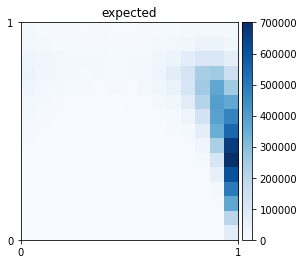

In [145]:
fig, ax = plt.subplots()

x, y = evol_dynamics.numerical._reshape_data(snow)

heatmap, xedges, yedges = np.histogram2d(x, y, bins=15)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

im = ax.imshow(heatmap.T, extent=extent, cmap=cmaps[0], origin="lower")

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

ax.set_xticks(np.linspace(0, 1, 2))
ax.set_yticks(np.linspace(0, 1, 2))

ax.title.set_text(mode)

fig.show()

In [146]:
# ((b - c) / 2, (b / 2) - c, (b / 2), 0)

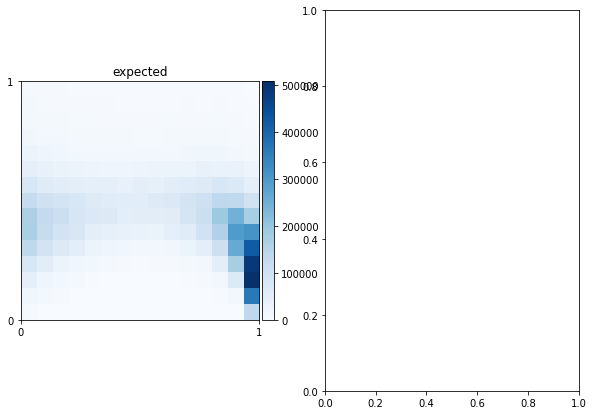

In [99]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 7))

for i, mode in enumerate(['expected']):

    x, y = evol_dynamics.numerical._reshape_data(snow[snow['mode']==mode])

    heatmap, xedges, yedges = np.histogram2d(x, y, bins=15)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    im = ax[i].imshow(heatmap.T, extent=extent, cmap=cmaps[i], origin="lower")
    
    divider = make_axes_locatable(ax[i])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

    ax[i].set_xticks(np.linspace(0, 1, 2))
    ax[i].set_yticks(np.linspace(0, 1, 2))
    
    ax[i].title.set_text(mode)

fig.show()

In [79]:
df = pd.read_csv("data/expected_snowdrift_3_payoffs.csv")
df.columns = simulation_columns

In [80]:
x, y = evol_dynamics.numerical._reshape_data(df)

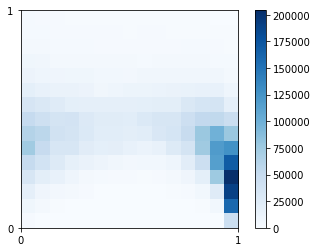

In [81]:
cmap = matplotlib.cm.get_cmap("Blues")

heatmap, xedges, yedges = np.histogram2d(x, y, bins=15)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, cmap=cmap, origin="lower")

plt.colorbar()
plt.xticks(np.linspace(0, 1, 2))
plt.yticks(np.linspace(0, 1, 2))
plt.show()

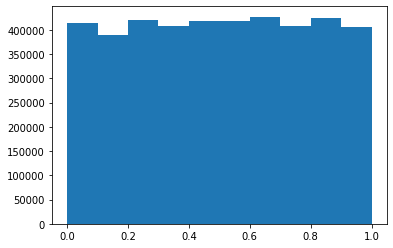

In [51]:
plt.hist(df['y']);

In [86]:
ALLD_dfs = []

for file in glob.glob(f"data/invade_ALLD/snowdrift/*.csv"):
    df = pd.read_csv(file, header=None)
    df.columns = columns
    ALLD_dfs.append(df)
    
invade_defector_snow =  pd.concat(ALLD_dfs)

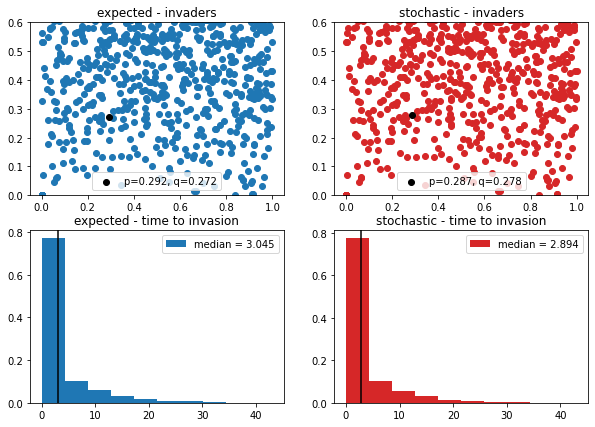

In [87]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10, 7))

for i, mode in enumerate(modes):
    
    df = invade_defector_snow[invade_defector_snow["mode"] == mode]
    
    # top row
    xs, ys = zip(*df[["p", "q"]].values)
    
    average_invador = [np.mean(df["p"]), np.mean(df["q"])]
    
    ax[(0, i)].scatter(xs, ys, color=colors[i])
    ax[(0, i)].scatter(average_invador[0], average_invador[1], color="black",
                  label=f"p={round(average_invador[0], 3)}, q={round(average_invador[1], 3)}")
    ax[(0, i)].set_ylim(0, 0.6)
    ax[(0, i)].title.set_text(f"{mode} - invaders")
    ax[(0, i)].legend()
    
    # bottom row
    
    measure = df["t"]
    mean = np.mean(measure)
    weights = np.ones_like(measure) / float(len(measure))

    ax[(1, i)].hist(
        measure,
        weights=weights,
        label=f"median = {round(mean, 3)}",
        color=colors[i],
    )
    ax[(1, i)].axvline(mean, color="black")
    ax[(1, i)].title.set_text(f"{mode} - time to invasion")
    
    ax[(1, i)].legend();

In [88]:
GTFT_dfs = []

for file in glob.glob(f"data/invade_GTFT/snowdrift/*.csv"):
    df = pd.read_csv(file, header=None)
    df.columns = columns
    GTFT_dfs.append(df)
    
invade_generous_tft_snow =  pd.concat(GTFT_dfs)

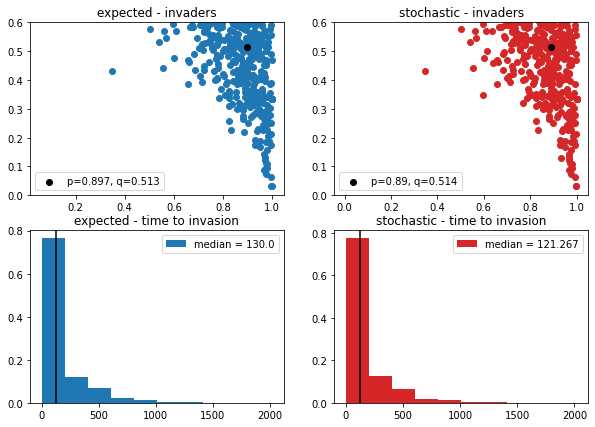

In [90]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10, 7))

for i, mode in enumerate(modes):
    
    df = invade_generous_tft_snow[invade_generous_tft_snow["mode"] == mode]
    
    # top row
    xs, ys = zip(*df[["p", "q"]].values)
    
    average_invador = [np.mean(df["p"]), np.mean(df["q"])]
    
    ax[(0, i)].scatter(xs, ys, color=colors[i])
    ax[(0, i)].scatter(average_invador[0], average_invador[1], color="black",
                  label=f"p={round(average_invador[0], 3)}, q={round(average_invador[1], 3)}")
    ax[(0, i)].set_ylim(0, 0.6)
    ax[(0, i)].title.set_text(f"{mode} - invaders")
    ax[(0, i)].legend()
    
    # bottom row
    
    measure = df["t"]
    mean = np.mean(measure)
    weights = np.ones_like(measure) / float(len(measure))

    ax[(1, i)].hist(
        measure,
        weights=weights,
        label=f"median = {round(mean, 3)}",
        color=colors[i],
    )
    ax[(1, i)].axvline(mean, color="black")
    ax[(1, i)].title.set_text(f"{mode} - time to invasion")
    
    ax[(1, i)].legend();

# Harmony Game

In [98]:
harmony_dfs = []
for file in glob.glob('data/*_harmony_*.csv'):
    df = pd.read_csv(file, header=None)
    df.columns = simulation_columns
    harmony_dfs.append(df)

In [99]:
harmony = pd.concat(harmony_dfs)

In [100]:
harmony.groupby("mode")['cooperation'].mean()

mode
expected      0.993347
stochastic    0.991293
Name: cooperation, dtype: float64

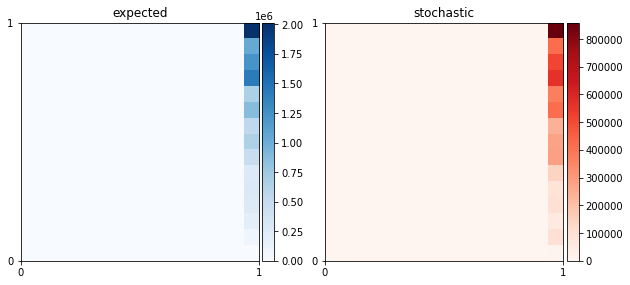

In [101]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 7))

for i, mode in enumerate(modes):

    x, y = evol_dynamics.numerical._reshape_data(harmony[harmony['mode']==mode])

    heatmap, xedges, yedges = np.histogram2d(x, y, bins=15)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    im = ax[i].imshow(heatmap.T, extent=extent, cmap=cmaps[i], origin="lower")
    
    divider = make_axes_locatable(ax[i])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

    ax[i].set_xticks(np.linspace(0, 1, 2))
    ax[i].set_yticks(np.linspace(0, 1, 2))
    
    ax[i].title.set_text(mode)

fig.show()

In [102]:
ALLD_dfs = []

for file in glob.glob(f"data/invade_ALLD/harmony/*.csv"):
    df = pd.read_csv(file, header=None)
    df.columns = columns
    ALLD_dfs.append(df)
    
invade_defector_harmony =  pd.concat(ALLD_dfs)

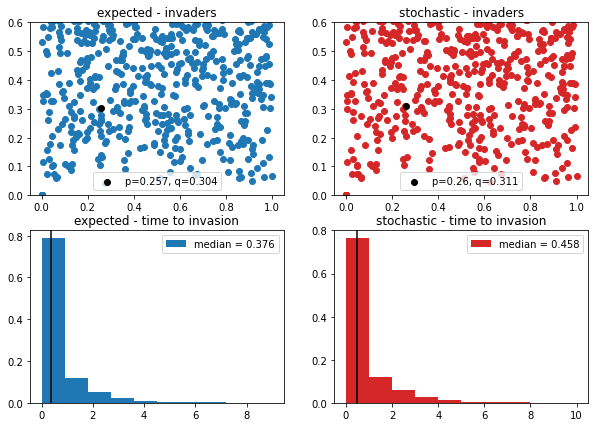

In [103]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10, 7))

for i, mode in enumerate(modes):
    
    df = invade_defector_harmoinvade_defector_harmonyarmony["mode"] == mode]
    
    # top row
    xs, ys = zip(*df[["p", "q"]].values)
    
    average_invador = [np.mean(df["p"]), np.mean(df["q"])]
    
    ax[(0, i)].scatter(xs, ys, color=colors[i])
    ax[(0, i)].scatter(average_invador[0], average_invador[1], color="black",
                  label=f"p={round(average_invador[0], 3)}, q={round(average_invador[1], 3)}")
    ax[(0, i)].set_ylim(0, 0.6)
    ax[(0, i)].title.set_text(f"{mode} - invaders")
    ax[(0, i)].legend()
    
    # bottom row
    
    measure = df["t"]
    mean = np.mean(measure)
    weights = np.ones_like(measure) / float(len(measure))

    ax[(1, i)].hist(
        measure,
        weights=weights,
        label=f"median = {round(mean, 3)}",
        color=colors[i],
    )
    ax[(1, i)].axvline(mean, color="black")
    ax[(1, i)].title.set_text(f"{mode} - time to invasion")
    
    ax[(1, i)].legend();

In [104]:
GTFT_dfs = []

for file in glob.glob(f"data/invade_GTFT/harmony/*.csv"):
    df = pd.read_csv(file, header=None)
    df.columns = columns
    GTFT_dfs.append(df)
    
invade_generous_tft_harmony =  pd.concat(GTFT_dfs)

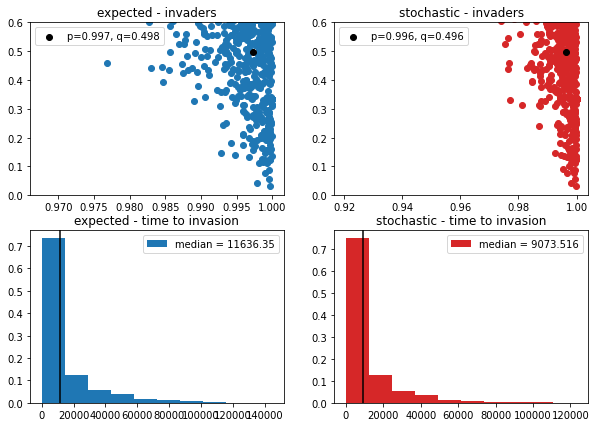

In [105]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10, 7))

for i, mode in enumerate(modes):
    
    df = invade_generous_tft_harmony[invade_generous_tft_harmony["mode"] == mode]
    
    # top row
    xs, ys = zip(*df[["p", "q"]].values)
    
    average_invador = [np.mean(df["p"]), np.mean(df["q"])]
    
    ax[(0, i)].scatter(xs, ys, color=colors[i])
    ax[(0, i)].scatter(average_invador[0], average_invador[1], color="black",
                  label=f"p={round(average_invador[0], 3)}, q={round(average_invador[1], 3)}")
    ax[(0, i)].set_ylim(0, 0.6)
    ax[(0, i)].title.set_text(f"{mode} - invaders")
    ax[(0, i)].legend()
    
    # bottom row
    
    measure = df["t"]
    mean = np.mean(measure)
    weights = np.ones_like(measure) / float(len(measure))

    ax[(1, i)].hist(
        measure,
        weights=weights,
        label=f"median = {round(mean, 3)}",
        color=colors[i],
    )
    ax[(1, i)].axvline(mean, color="black")
    ax[(1, i)].title.set_text(f"{mode} - time to invasion")
    
    ax[(1, i)].legend();